In [ ]:
import matplotlib.pyplot as plt
from rich import print_json, print
import polars as pl
import glob

pl.Config.set_tbl_cols(-1)# Configure Polars to display all columns


polars.config.Config

In [120]:
# Glob and concat all the dataset in a lazy dataframe
csv_files = glob.glob('data/part_9/may_july_chunk_*.csv')
lazy_frames = [pl.scan_csv(file, schema_overrides={'in_reply_to_status_id_str': pl.Utf8}, ignore_errors=True) for file in csv_files]
common_schema = lazy_frames[0].collect_schema()
lazy_frames = [frame.with_columns([pl.col(col).cast(dtype) for col, dtype in common_schema.items()]) for frame in lazy_frames]
lazy_df = pl.concat(lazy_frames)

# Create a not lazy dataframe that is a sample of n rows
n = 100000 # Change this variable to adjust the sample size
df = lazy_df.collect().sample(n=n)

In [121]:
print("\nDataframe schema:")
schema_dict = {key: str(value) for key, value in df.schema.items()} # Adapt to dictionnary to rich print
print_json(data=schema_dict)
df.describe()

Dataframe schema:

{
  "": "Int64",
  "id": "Int64",
  "text": "String",
  "url": "String",
  "epoch": "Float64",
  "media": "String",
  "retweetedTweet": "Boolean",
  "retweetedTweetID": "String",
  "retweetedUserID": "String",
  "id_str": "Int64",
  "lang": "String",
  "rawContent": "String",
  "replyCount": "Int64",
  "retweetCount": "Int64",
  "likeCount": "Float64",
  "quoteCount": "Int64",
  "conversationId": "Int64",
  "conversationIdStr": "Int64",
  "hashtags": "String",
  "mentionedUsers": "String",
  "links": "String",
  "viewCount": "String",
  "quotedTweet": "Boolean",
  "in_reply_to_screen_name": "String",
  "in_reply_to_status_id_str": "String",
  "in_reply_to_user_id_str": "Float64",
  "location": "String",
  "cash_app_handle": "String",
  "user": "String",
  "date": "String",
  "_type": "String",
  "type": "String"
}

statistic,,id,text,url,epoch,media,retweetedTweet,retweetedTweetID,retweetedUserID,id_str,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,conversationIdStr,hashtags,mentionedUsers,links,viewCount,quotedTweet,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,location,cash_app_handle,user,date,_type,type
str,f64,f64,str,str,f64,str,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,str,str,f64,str,str,str,str,str,str
"""count""",100000.0,100000.0,"""100000""","""100000""",100000.0,"""100000""",100000.0,"""0""","""0""",100000.0,"""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""","""100000""","""100000""",100000.0,"""60540""","""71381""",60540.0,"""12245""","""12245""","""100000""","""100000""","""0""","""100000"""
"""null_count""",0.0,0.0,"""0""","""0""",0.0,"""0""",0.0,"""100000""","""100000""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,"""39460""","""28619""",39460.0,"""87755""","""87755""","""0""","""0""","""100000""","""0"""
"""mean""",25015.76142,1.8139e18,null,null,1.7213e9,null,0.0,null,null,1.8139e18,null,null,2.7242,5.81575,30.77851,0.39745,1.8121e18,1.8121e18,null,null,null,null,0.11725,null,null,6.1646e17,null,null,null,null,null,null
"""std""",14487.162005,1.3708e15,null,null,326813.941381,null,null,null,null,1.3708e15,null,null,91.506519,182.797099,1091.596553,12.389727,3.2078e16,3.2078e16,null,null,null,null,null,null,null,6.8755e17,null,null,null,null,null,null
"""min""",0.0,1.8101e18,"""! Gop imports""","""https://twitter.com/0000000000…",1.7204e9,"""PW""",0.0,null,null,1.8101e18,"""ar""","""! Gop imports""",0.0,0.0,0.0,0.0,7.3727e17,7.3727e17,"""[]""","""[]""","""[]""","""PW""",0.0,"""007AliSohrab""","""1.0276056467730472e+18""",3840.0,"""PW""","""PW""","""{'id': 1000006971070836737, 'i…","""2024-07-08""",null,"""tweet-"""
"""25%""",12424.0,1.8137e18,null,null,1.7213e9,null,null,null,null,1.8137e18,null,null,0.0,0.0,0.0,0.0,1.8136e18,1.8136e18,null,null,null,null,null,null,null,1.21597316e8,null,null,null,null,null,null
"""50%""",25077.0,1.8146e18,null,null,1.7215e9,null,null,null,null,1.8146e18,null,null,0.0,0.0,0.0,0.0,1.8144e18,1.8144e18,null,null,null,null,null,null,null,3.0961e9,null,null,null,null,null,null
"""75%""",37609.0,1.8148e18,null,null,1.7215e9,null,null,null,null,1.8148e18,null,null,0.0,0.0,1.0,0.0,1.8147e18,1.8147e18,null,null,null,null,null,null,null,1.3422e18,null,null,null,null,null,null
"""max""",49999.0,1.8152e18,"""🫶🙌""","""https://twitter.com/zzziiinnng…",1.7216e9,"""[{'display_url': 'pic.x.com/zz…",0.0,null,null,1.8152e18,"""zxx""","""🫶🙌""",16180.0,23015.0,195483.0,1561.0,1.8152e18,1.8152e18,"""[{'indices': [99, 131], 'text'…","""[{'id_str': '99942639679041945…","""[{'display_url': '…saging-cust…","""{'state': 'Enabled'}""",1.0,"""zzz_katt""","""PW""",1.8151e18,"""PW""","""PW""","""{'id': 999989552516423680, 'id…","""2024-07-21""",null,"""tweet-"""


In [122]:
# Filter the dataframe to include only the specified columns
filtered_df = df.select([
    'id', 'text', 'url', 'retweetedTweet', 'lang', 'replyCount',
    'retweetCount', 'likeCount', 'quoteCount', 'viewCount',
    'quotedTweet', 'user', 'date'
])

print("Filtered dataframe:")
print(filtered_df.head(5))

Filtered dataframe:

shape: (5, 13)
┌─────┬─────┬─────┬────────┬──────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ id  ┆ tex ┆ url ┆ retwee ┆ lang ┆ replyC ┆ retwe ┆ likeC ┆ quote ┆ viewC ┆ quote ┆ user  ┆ date  │
│ --- ┆ t   ┆ --- ┆ tedTwe ┆ ---  ┆ ount   ┆ etCou ┆ ount  ┆ Count ┆ ount  ┆ dTwee ┆ ---   ┆ ---   │
│ i64 ┆ --- ┆ str ┆ et     ┆ str  ┆ ---    ┆ nt    ┆ ---   ┆ ---   ┆ ---   ┆ t     ┆ str   ┆ str   │
│     ┆ str ┆     ┆ ---    ┆      ┆ i64    ┆ ---   ┆ f64   ┆ i64   ┆ str   ┆ ---   ┆       ┆       │
│     ┆     ┆     ┆ bool   ┆      ┆        ┆ i64   ┆       ┆       ┆       ┆ bool  ┆       ┆       │
╞═════╪═════╪═════╪════════╪══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ 181 ┆ CNN ┆ htt ┆ false  ┆ en   ┆ 0      ┆ 0     ┆ 0.0   ┆ 0     ┆ {'cou ┆ false ┆ {'id' ┆ 2024- │
│ 371 ┆ ’s  ┆ ps: ┆        ┆      ┆        ┆       ┆       ┆       ┆ nt':  ┆       ┆ : 822 ┆ 07-17 │
│ 536 ┆ Van ┆ //t ┆        ┆      ┆        ┆       ┆       ┆       ┆ '11', ┆       ┆ 10264 ┆       │
│ 461 ┆ Jon ┆ wit ┆        ┆      ┆        ┆       ┆       ┆       ┆ 'stat ┆       ┆ 37367 ┆       │
│ 149 ┆ es  ┆ ter ┆        ┆      ┆        ┆       ┆       ┆       ┆ e':   ┆       ┆ 39840 ┆       │
│ 027 ┆ cal ┆ .co ┆        ┆      ┆        ┆       ┆       ┆       ┆ 'Enab ┆       ┆ ,     ┆       │
│ 5   ┆ ls  ┆ m/d ┆        ┆      ┆        ┆       ┆       ┆       ┆ …     ┆       ┆ 'id…  ┆       │
│     ┆ Bla ┆ db2 ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ ck  ┆ 919 ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ mo… ┆ 55/ ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆     ┆ …   ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│ 181 ┆ LET ┆ htt ┆ false  ┆ en   ┆ 0      ┆ 0     ┆ 5.0   ┆ 0     ┆ PW    ┆ true  ┆ {'id' ┆ 2024- │
│ 193 ┆ ’S  ┆ ps: ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆ : 192 ┆ 07-13 │
│ 351 ┆ GO  ┆ //t ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆ 11695 ┆       │
│ 498 ┆ #Ge ┆ wit ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆ , 'id ┆       │
│ 135 ┆ nZ! ┆ ter ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆ _str' ┆       │
│ 963 ┆ !   ┆ .co ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆ :     ┆       │
│ 7   ┆ My  ┆ m/g ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆ '19…  ┆       │
│     ┆ dau ┆ oho ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ ght ┆ gsg ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ ers ┆ irl ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ …   ┆ …   ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│ 181 ┆ Nat ┆ htt ┆ false  ┆ en   ┆ 0      ┆ 0     ┆ 3.0   ┆ 0     ┆ {'cou ┆ true  ┆ {'id' ┆ 2024- │
│ 476 ┆ e   ┆ ps: ┆        ┆      ┆        ┆       ┆       ┆       ┆ nt':  ┆       ┆ : 102 ┆ 07-20 │
│ 319 ┆ Sil ┆ //t ┆        ┆      ┆        ┆       ┆       ┆       ┆ '234' ┆       ┆ 19526 ┆       │
│ 370 ┆ ver ┆ wit ┆        ┆      ┆        ┆       ┆       ┆       ┆ , 'st ┆       ┆ 0,    ┆       │
│ 275 ┆ has ┆ ter ┆        ┆      ┆        ┆       ┆       ┆       ┆ ate': ┆       ┆ 'id_s ┆       │
│ 269 ┆ res ┆ .co ┆        ┆      ┆        ┆       ┆       ┆       ┆ 'Ena… ┆       ┆ tr':  ┆       │
│ 3   ┆ ort ┆ m/j ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆ '1…   ┆       │
│     ┆ ed  ┆ ust ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ to  ┆ cal ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ bu… ┆ lme ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆     ┆ …   ┆        ┆      ┆        ┆  

In [123]:
# Display the content of the 'viewCount' and 'user' columns for one row in dictionary format
row_index = 0  # Adjust the index to select a specific row
view_count_dict = filtered_df[row_index, 'viewCount']
user_dict = filtered_df[row_index, 'user']

print("ViewCount column for one row as dictionary:")
print_json(data=view_count_dict)

print("\nUser column for one row as dictionary:")
print_json(data=user_dict)

ViewCount column for one row as dictionary:

"{'count': '11', 'state': 'EnabledWithCount'}"

User column for one row as dictionary:

"{'id': 822102643736739840, 'id_str': '822102643736739840', 'url': 'https://twitter.com/D.D.', 'username': 'D.D.', 'rawDescription': '稀缺 绝版 资源👉电报群👉 https://t.co/IDNuljLn7c      你想看却找不到的都有✈️✈️集合全网最稀缺资源✈️  永不停更，每一部都是精品  family', 'created': datetime.datetime(2017, 1, 19, 15, 25, 19, tzinfo=datetime.timezone.utc), 'followersCount': 1251, 'friendsCount': 3248, 'statusesCount': 188469, 'favouritesCount': 101474, 'listedCount': 3, 'mediaCount': 173, 'location': 'Louisville, KY', 'profileImageUrl': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profileBannerUrl': 'PW', 'protected': 'PW', 'verified': False, 'blue': True, 'blueType': None, 'descriptionLinks': ['PW'], '_type': 'PW'}"

[Lien DrawDB](https://drawdb.vercel.app/editor?shareId=e6c18b8ae53063fa1dfa9cc8a849605f)

```sql
CREATE TABLE `x_post` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`user_id` INTEGER,
	`lang` TEXT(65535),
	`text` TEXT(65535),
	`like_count` INTEGER,
	`reply_count` INTEGER,
	`retweet_count` INTEGER,
	`quote_count` INTEGER,
	`date` DATE,
	PRIMARY KEY(`id`)
);


CREATE TABLE `x_user` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`name` TEXT(65535),
	`bio` TEXT(65535),
	`followers_count` INTEGER,
	`follows_count` INTEGER,
	PRIMARY KEY(`id`)
);


CREATE TABLE `bsky_post` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`user_id` INTEGER,
	`lang` TEXT(65535),
	`text` TEXT(65535),
	`like_count` INTEGER,
	`reply_count` INTEGER,
	`retweet_count` INTEGER,
	`quote_count` INTEGER,
	`date` DATE,
	PRIMARY KEY(`id`)
);


CREATE TABLE `bsky_user` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`name` TEXT(65535),
	`bio` TEXT(65535),
	`followers_count` INTEGER,
	`follows_count` INTEGER,
	PRIMARY KEY(`id`)
);


ALTER TABLE `x_post`
ADD FOREIGN KEY(`user_id`) REFERENCES `x_user`(`id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;
ALTER TABLE `bsky_post`
ADD FOREIGN KEY(`user_id`) REFERENCES `bsky_user`(`id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;
```

/tmp/ipykernel_4253/2106626662.py:2: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  date_counts = df.group_by('date').count()


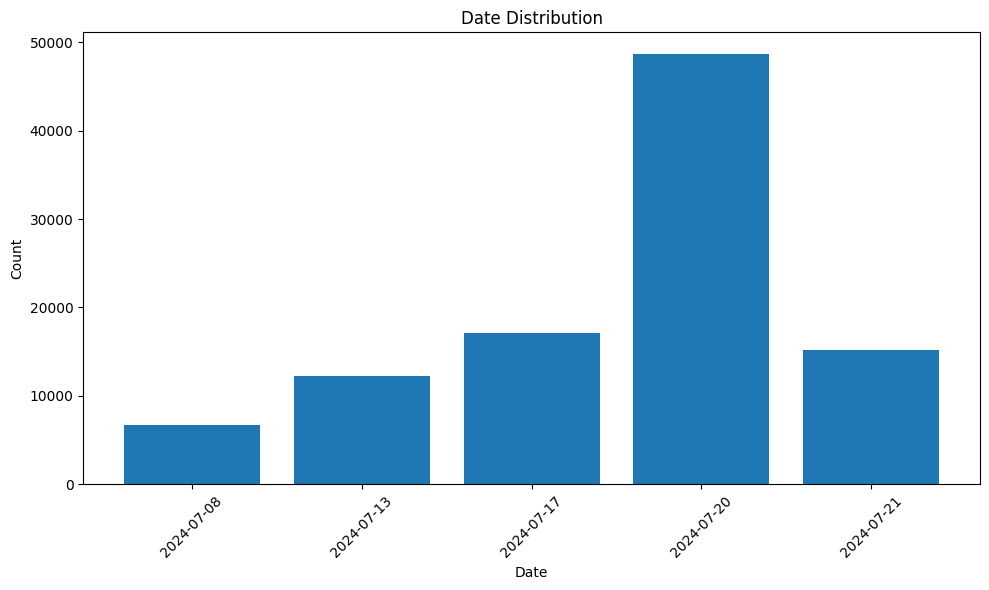

In [124]:
# Group by 'date' and count occurrences
date_counts = df.group_by('date').count()

# Sort by 'date' to ensure correct order
date_counts = date_counts.sort('date')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(date_counts['date'], date_counts['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()